In [1]:
%matplotlib inline
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
import os
import scipy.io as sio
import matplotlib
import logging

import utils as utils
from matplotlib import cm

In [2]:
runname = 'debug_withC_rogers_netcdfBdy1_EB_soliton_f_withsponge_focus_finey_summer'
datafilepath = '../'+runname+'/data/'

# datafilename = 'sun_out.nc_0000.nc'
datafilename = 'sun_sparse.nc_0000.nc'

# path to saved result
resultfilepath = datafilepath[:-5] + 'mfiles/results/'
# path to saved figures
outfilepath = datafilepath[:-5] + 'mfiles/figure/'
if not os.path.exists(resultfilepath):
    os.mkdir(resultfilepath)
if not os.path.exists(outfilepath):
    os.mkdir(outfilepath)

param_data = {
    "datafilepath": datafilepath,
    "netcdf_filename": datafilename,
            }
param_result = {
    "resultfilepath": resultfilepath,
    "result_filename": 'sun_out_energy_derived.nc',
            }
idx_end = -15

# Organize data output

In [ ]:
# read data
Data = xr.open_dataset(datafilepath+datafilename)

# grid info
import mat73
grid = mat73.loadmat('../'+runname+'/mfiles/SUNTANS_grid.mat', only_include=['Nk', 'Nx', 'Ny', 'Depth']) 

Nx = grid['Nx'].astype('int')
Ny = grid['Ny'].astype('int')
Nk = grid['Nk'].astype('int')
Nc = Nx*Ny
Depth = np.reshape(grid['Depth'].astype('int'), (Nx, Ny), order='F')

xv = np.reshape(Data.xv.data, (Nx, Ny), order='F')
yv = np.reshape(Data.yv.data, (Nx, Ny), order='F')

## _derived

In [ ]:
dEk_prime = np.reshape(Data.dEk_prime.data, (len(Data.time), Nx, Ny), order='F')
dEp_prime = np.reshape(Data.dEp_prime.data, (len(Data.time), Nx, Ny), order='F')

In [ ]:
dEp0 = np.reshape(Data.dEp0.data, (len(Data.time), Nx, Ny), order='F')
dEk0 = np.reshape(Data.dEk0.data, (len(Data.time), Nx, Ny), order='F')

data = xr.Dataset({'dEp0': (['time','x', 'y'], dEp0),
                   'dEp_prime': (['time','x', 'y'], dEp_prime),
                   'dEk0': (['time','x', 'y'], dEk0),
                   'dEk_prime': (['time','x', 'y'], dEk_prime),
                  },
                  coords={'x': xv[:,0],
                          'y': yv[0,:],
                          'z': -Data.z_r.data,
                          'time': Data.time.data},
                  attrs={'title': 'SUNTANS internally calculated energy budget'}) 

del dEp0, dEp_prime, dEk0, dEk_prime

C1 = np.reshape(Data.C1_int.data, (len(Data.time), Nx, Ny), order='F')
C2 = np.reshape(Data.C2_int.data, (len(Data.time), Nx, Ny), order='F')
data["C1_int"]=(['time', 'x', 'y'],  C1)
data["C2_int"]=(['time', 'x', 'y'],  C2)

del C1, C2

D_0 = np.reshape(Data.D_0_int.data, (len(Data.time), Nx, Ny), order='F')
D_prime = np.reshape(Data.D_prime_int.data, (len(Data.time), Nx, Ny), order='F')
data["D_0"]=(['time', 'x', 'y'],  D_0)
data["D_prime"]=(['time', 'x', 'y'],  D_prime)

del D_0, D_prime

data["depth"]=(['x', 'y'],  Depth)

data.to_netcdf(param_result['resultfilepath']+param_result['result_filename'])

## _bt_flux

In [ ]:
Fx_01 = np.reshape(Data.Fx_01_int.data, (len(Data.time), Nx, Ny), order='F')
Fx_02 = np.reshape(Data.Fx_02_int.data, (len(Data.time), Nx, Ny), order='F')
Fx_03 = np.reshape(Data.Fx_03_int.data, (len(Data.time), Nx, Ny), order='F')
Fx_04 = np.reshape(Data.Fx_04_int.data, (len(Data.time), Nx, Ny), order='F')

data_bt = xr.Dataset({'Fx_01_int': (['time','x', 'y'], Fx_01),
                  },
                  coords={'x': xv[:,0],
                          'y': yv[0,:],
                          'z': -Data.z_r.data,
                          'time': Data.time.data},
                  attrs={'title': 'SUNTANS internally calculated energy budget'}) 
data_bt["Fx_02_int"]=(['time', 'x', 'y'],  Fx_02)
data_bt["Fx_03_int"]=(['time', 'x', 'y'],  Fx_03)
data_bt["Fx_04_int"]=(['time', 'x', 'y'],  Fx_04)

del Fx_01, Fx_02, Fx_03, Fx_04

Fy_01 = np.reshape(Data.Fy_01_int.data, (len(Data.time), Nx, Ny), order='F')
Fy_02 = np.reshape(Data.Fy_02_int.data, (len(Data.time), Nx, Ny), order='F')
Fy_03 = np.reshape(Data.Fy_03_int.data, (len(Data.time), Nx, Ny), order='F')
Fy_04 = np.reshape(Data.Fy_04_int.data, (len(Data.time), Nx, Ny), order='F')

data_bt["Fy_01_int"]=(['time', 'x', 'y'],  Fy_01)
data_bt["Fy_02_int"]=(['time', 'x', 'y'],  Fy_02)
data_bt["Fy_03_int"]=(['time', 'x', 'y'],  Fy_03)
data_bt["Fy_04_int"]=(['time', 'x', 'y'],  Fy_04)

del Fy_01, Fy_02, Fy_03, Fy_04

data_bt.to_netcdf(param_result['resultfilepath']+param_result['result_filename'][:-3]+'_bt_flux.nc')

## _bc_flux

In [ ]:
Fx_prime1 = np.reshape(Data.Fx_prime1_int.data, (len(Data.time), Nx, Ny), order='F')
Fx_prime2 = np.reshape(Data.Fx_prime2_int.data, (len(Data.time), Nx, Ny), order='F')
Fx_prime3 = np.reshape(Data.Fx_prime3_int.data, (len(Data.time), Nx, Ny), order='F')
Fx_prime4 = np.reshape(Data.Fx_prime4_int.data, (len(Data.time), Nx, Ny), order='F')
Fx_prime5 = np.reshape(Data.Fx_prime5_int.data, (len(Data.time), Nx, Ny), order='F')

data_bc = xr.Dataset({'Fx_prime1_int': (['time','x', 'y'], Fx_prime1),
                  },
                  coords={'x': xv[:,0],
                          'y': yv[0,:],
                          'z': -Data.z_r.data,
                          'time': Data.time.data},
                  attrs={'title': 'SUNTANS internally calculated energy budget'}) 
data_bc["Fx_prime2_int"]=(['time', 'x', 'y'],  Fx_prime2)
data_bc["Fx_prime3_int"]=(['time', 'x', 'y'],  Fx_prime3)
data_bc["Fx_prime4_int"]=(['time', 'x', 'y'],  Fx_prime4)
data_bc["Fx_prime5_int"]=(['time', 'x', 'y'],  Fx_prime5)

del Fx_prime1, Fx_prime2, Fx_prime3, Fx_prime4, Fx_prime5

Fy_prime1 = np.reshape(Data.Fy_prime1_int.data, (len(Data.time), Nx, Ny), order='F')
Fy_prime2 = np.reshape(Data.Fy_prime2_int.data, (len(Data.time), Nx, Ny), order='F')
Fy_prime3 = np.reshape(Data.Fy_prime3_int.data, (len(Data.time), Nx, Ny), order='F')
Fy_prime4 = np.reshape(Data.Fy_prime4_int.data, (len(Data.time), Nx, Ny), order='F')
Fy_prime5 = np.reshape(Data.Fy_prime5_int.data, (len(Data.time), Nx, Ny), order='F')

data_bc["Fy_prime1_int"]=(['time', 'x', 'y'],  Fy_prime1)
data_bc["Fy_prime2_int"]=(['time', 'x', 'y'],  Fy_prime2)
data_bc["Fy_prime3_int"]=(['time', 'x', 'y'],  Fy_prime3)
data_bc["Fy_prime4_int"]=(['time', 'x', 'y'],  Fy_prime4)
data_bc["Fy_prime5_int"]=(['time', 'x', 'y'],  Fy_prime5)

del Fy_prime1, Fy_prime2, Fy_prime3, Fy_prime4, Fy_prime5
del Data

data_bc.to_netcdf(param_result['resultfilepath']+param_result['result_filename'][:-3]+'_bc_flux.nc')

## _derived

In [ ]:
data_bt = xr.open_dataset(param_result['resultfilepath']+param_result['result_filename'][:-3]+'_bt_flux.nc')

div_F01 = data_bt.Fx_01_int.differentiate("x") + data_bt.Fy_01_int.differentiate("y")
div_F02 = data_bt.Fx_02_int.differentiate("x") + data_bt.Fy_02_int.differentiate("y")
div_F03 = data_bt.Fx_03_int.differentiate("x") + data_bt.Fy_03_int.differentiate("y")
div_F04 = data_bt.Fx_04_int.differentiate("x") + data_bt.Fy_04_int.differentiate("y")

In [11]:
div_F0 = div_F01+div_F02+div_F03+div_F04

NameError: name 'div_F01' is not defined

In [ ]:
data_bt["div_F0"]=(['time', 'x', 'y'],  div_F0.data)
data_bt["div_F01"]=(['time', 'x', 'y'],  div_F01.data)
data_bt["div_F02"]=(['time', 'x', 'y'],  div_F02.data)
data_bt["div_F03"]=(['time', 'x', 'y'],  div_F03.data)
data_bt["div_F04"]=(['time', 'x', 'y'],  div_F04.data)

data_bt.to_netcdf(param_result['resultfilepath']+param_result['result_filename'][:-3]+'_bt.nc')

del div_F01, div_F02, div_F03, div_F04, div_F0, data_bt

In [ ]:
# read data
data_bc = xr.open_dataset(param_result['resultfilepath']+param_result['result_filename'][:-3]+'_bc.nc')

div_Fprime1 = data_bc.Fx_prime1_int.differentiate("x") + data_bc.Fy_prime1_int.differentiate("y")
div_Fprime2 = data_bc.Fx_prime2_int.differentiate("x") + data_bc.Fy_prime2_int.differentiate("y")
div_Fprime3 = data_bc.Fx_prime3_int.differentiate("x") + data_bc.Fy_prime3_int.differentiate("y")
div_Fprime4 = data_bc.Fx_prime4_int.differentiate("x") + data_bc.Fy_prime4_int.differentiate("y")
div_Fprime5 = data_bc.Fx_prime5_int.differentiate("x") + data_bc.Fy_prime5_int.differentiate("y")

In [ ]:
div_Fprime = div_Fprime1+div_Fprime2+div_Fprime3+div_Fprime4+div_Fprime5

In [ ]:
data_bc["div_Fprime"]=(['time', 'x', 'y'],  div_Fprime.data)
data_bc["div_Fprime1"]=(['time', 'x', 'y'],  div_Fprime1.data)
data_bc["div_Fprime2"]=(['time', 'x', 'y'],  div_Fprime2.data)
data_bc["div_Fprime3"]=(['time', 'x', 'y'],  div_Fprime3.data)
data_bc["div_Fprime4"]=(['time', 'x', 'y'],  div_Fprime4.data)
data_bc["div_Fprime5"]=(['time', 'x', 'y'],  div_Fprime5.data)

data_bc.to_netcdf(param_result['resultfilepath']+param_result['result_filename'][:-3]+'_bc.nc')

del div_Fprime1, div_Fprime2, div_Fprime3, div_Fprime4, div_Fprime5, div_Fprime, data_bc

In [ ]:
data_bt = xr.open_dataset(param_result['resultfilepath']+param_result['result_filename'][:-3]+'_bt.nc')
data_bt = data_bt.drop_vars([
    'Fx_01_int',
    'Fx_02_int',
    'Fx_03_int',
    'Fx_04_int',
    'Fy_01_int',
    'Fy_02_int',
    'Fy_03_int',
    'Fy_04_int',
]
)

data_bc = xr.open_dataset(param_result['resultfilepath']+param_result['result_filename'][:-3]+'_bc.nc')
data_bc = data_bc.drop_vars([
    'Fx_prime1_int',
    'Fx_prime2_int',
    'Fx_prime3_int',
    'Fx_prime4_int',
    'Fx_prime5_int',
    'Fy_prime1_int',
    'Fy_prime2_int',
    'Fy_prime3_int',
    'Fy_prime4_int',
    'Fy_prime5_int',
]
)


In [ ]:
data = xr.open_dataset(param_result['resultfilepath']+param_result['result_filename'])
dissip = data.dEp0 + data.dEp_prime + data.dEk0 + data.dEk_prime + data_bt.div_F0 + data_bc.div_Fprime

data["dissip"]=(['time', 'x', 'y'],  dissip.data)
data["div_Fprime"]=(['time', 'x', 'y'],  data_bc.div_Fprime.data)
data["div_0"]=(['time', 'x', 'y'],  data_bt.div_F0.data)

In [ ]:
data.to_netcdf(param_result['resultfilepath']+param_result['result_filename'])

del data_bt, data_bc

# Energy budget

In [32]:
lambdaM2=70.1e3
l_sponge = 20e3
L=1.5*lambdaM2+2*l_sponge
W=1.5*lambdaM2

x_c = 2*l_sponge+1.5*lambdaM2/2
y_c = W/2

In [ ]:
data=xr.open_dataset(param_result['resultfilepath']+param_result['result_filename'])

## dEk, dEp

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


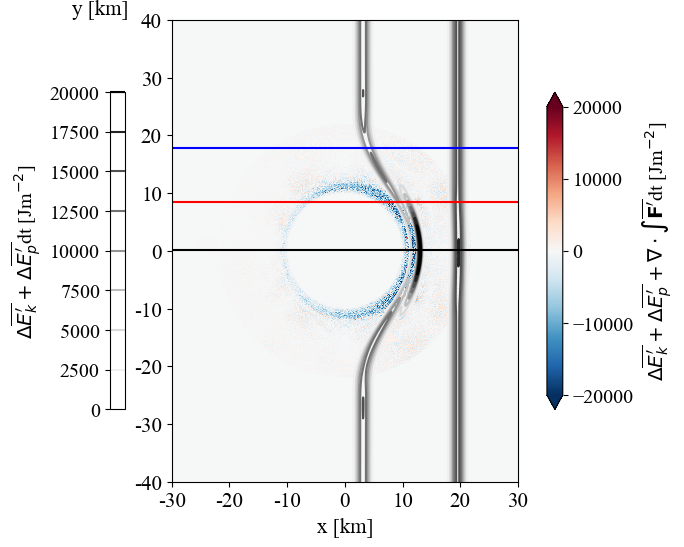

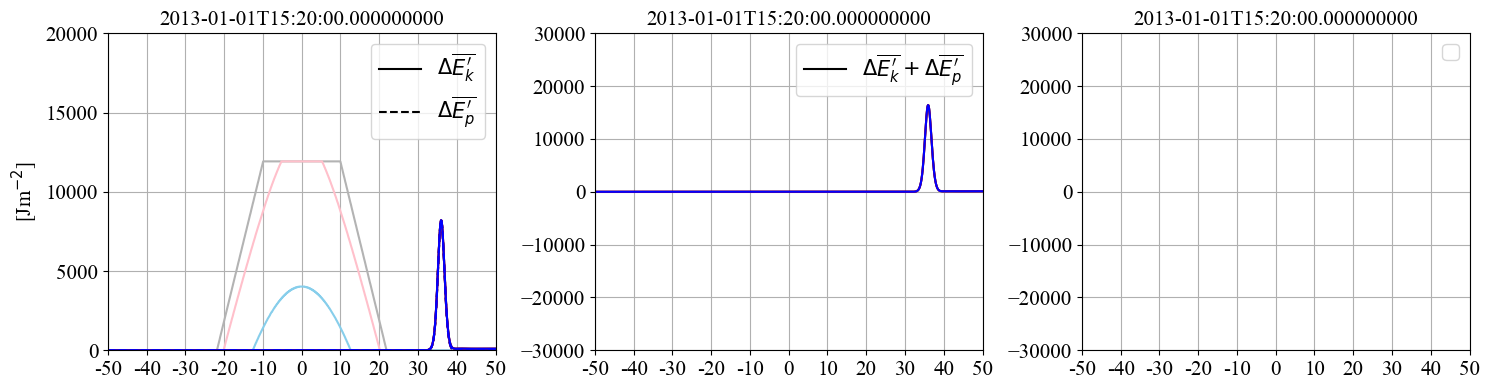

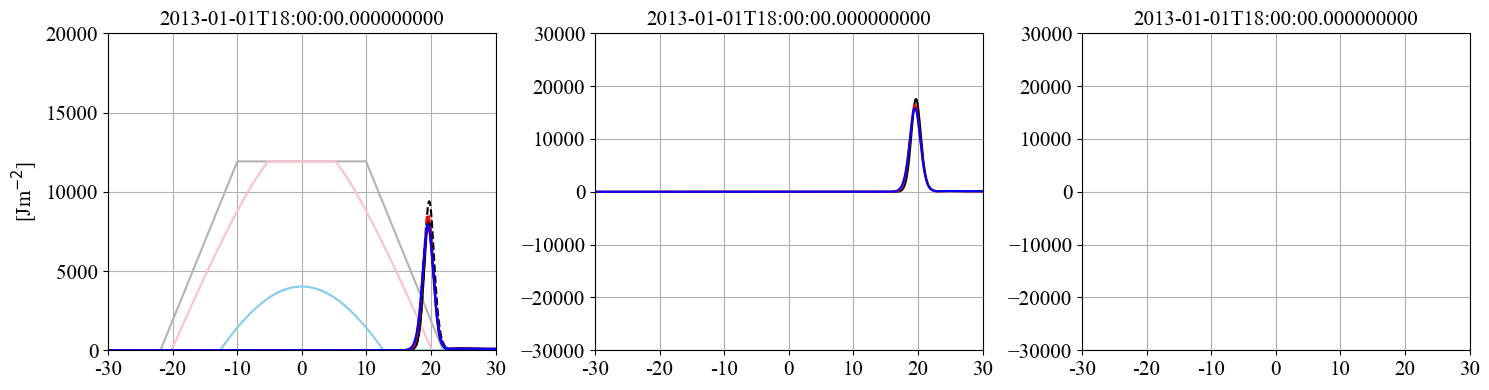

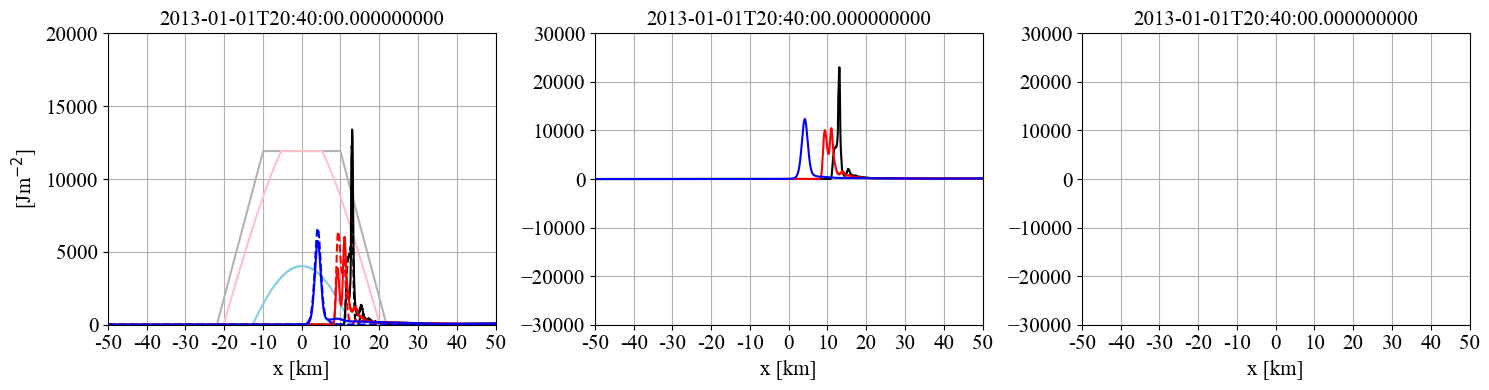

In [14]:
idx_y1 = int(len(data.y)/2)
idx_y2 = int(len(data.y)/2)+150
idx_y3 = int(len(data.y)/2)+300

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(7,6))
im1 = data.dissip[-1,:,:].T.plot(ax=ax, vmax=2e4, vmin=-2e4, cmap=cm.RdBu_r, add_colorbar=False)
cb1 = plt.colorbar(im1, location='right', shrink=0.6, extend='both')
cb1.set_label(label=r"$\Delta\overline{E_k'}+\Delta\overline{E_p'}+\nabla\cdot\int\overline{\mathbf{F'}}$dt [Jm$^{-2}$]", size='x-large')
cb1.ax.tick_params(labelsize='x-large')

count = 0
for idx_t in [25,45,65]:
    if count==0:
        im2 = (data.dEk_prime[idx_t,:,:]+data.dEp_prime[idx_t,:,:]).T.plot.contour(cmap=cm.Greys, vmin=0, vmax=2e4, levels =9)
    else:
        (data.dEk_prime[idx_t,:,:]+data.dEp_prime[idx_t,:,:]).T.plot.contour(cmap=cm.Greys, vmin=0, vmax=2e4, levels =9)
    count+=1
cb2 = plt.colorbar(im2, location='left', shrink=0.6, extend='both')
cb2.set_label(label=r"$\Delta\overline{E_k'}+\Delta\overline{E_p'}$dt [Jm$^{-2}$]", size='x-large')
cb2.ax.tick_params(labelsize='x-large')
    
ax.plot([data.x[0].data,data.x[-1].data],[data.y[idx_y1],data.y[idx_y1]], 'k')
ax.plot([data.x[0].data,data.x[-1].data],[data.y[idx_y2],data.y[idx_y2]], 'r')
ax.plot([data.x[0].data,data.x[-1].data],[data.y[idx_y3],data.y[idx_y3]], 'b')

ax.set_xlim([x_c-30000, x_c+30000])
ax.set_ylim([y_c-40000, y_c+40000])
ax.set_xticks(np.arange(x_c-30000,x_c+30000+1,10000))
ax.set_yticks(np.arange(y_c-40000,y_c+40000+1,10000))
ax.set_xticklabels(['-30', '-20', '-10', '0', '10', '20', '30'])
ax.set_yticklabels(['-40', '-30', '-20', '-10', '0', '10', '20', '30', '40'])
ax.set_aspect('equal')
ax.set_xlabel('x [km]', fontsize=15)
ax.set_ylabel('y [km]', fontsize=15, loc="top", rotation="horizontal")
ax.set_title(f'')
ax.tick_params(axis='both', which='major', labelsize=15)
plt.rcParams["font.family"] = "Times New Roman"
plt.tight_layout()

# plt.savefig(outfilepath+ f"new_energybalance_overhead.jpeg", dpi=300)

for idx_t in [25,45,65]:
    fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(15,4))
    (-data.depth[:,idx_y1]*20+1.2e+4).plot(ax=ax[0],c='.7',ls='-')
    (-data.depth[:,idx_y2]*20+1.2e+4).plot(ax=ax[0],c='pink',ls='-')
    (-data.depth[:,idx_y3]*20+1.2e+4).plot(ax=ax[0],c='skyblue',ls='-')

    if idx_t<40:
        data.dEk_prime[idx_t,:,idx_y1].plot(ax=ax[0],c='k',ls='-',label="$\Delta\overline{E_k'}$")#,label=f"y={data.y[idx_y1].data}")
        data.dEp_prime[idx_t,:,idx_y1].plot(ax=ax[0],c='k',ls='--',label="$\Delta\overline{E_p'}$")
        (data.dEk_prime[idx_t,:,idx_y1]+data.dEp_prime[idx_t,:,idx_y1]).plot(ax=ax[1],c='k',label="$\Delta\overline{E_k'}+\Delta\overline{E_p'}$")
        # data.div_Fprime[idx_t,:,idx_y1].plot(ax=ax[1],c='.7',label=r"$\nabla\cdot\int\overline{\mathbf{F'}}$dt")
        # (data.dEk_prime[idx_t,:,idx_y1]+data.dEp_prime[idx_t,:,idx_y1]+data.div_Fprime[idx_t,:,idx_y1]).plot(ax=ax[-1],c='k',label=r"$\Delta\overline{E_k'}+\Delta\overline{E_p'}+\nabla\cdot\int\overline{\mathbf{F'}}$dt")
        ax[0].legend(fontsize=15)
        ax[1].legend(fontsize=15)
        ax[-1].legend(fontsize=15)
    else:
        data.dEk_prime[idx_t,:,idx_y1].plot(ax=ax[0],c='k',ls='-')#,label=f"y={data.y[idx_y1].data}")
        data.dEp_prime[idx_t,:,idx_y1].plot(ax=ax[0],c='k',ls='--')
        (data.dEk_prime[idx_t,:,idx_y1]+data.dEp_prime[idx_t,:,idx_y1]).plot(ax=ax[1],c='k')
        # data.div_Fprime[idx_t,:,idx_y1].plot(ax=ax[1],c='.7')
        # (data.dEk_prime[idx_t,:,idx_y1]+data.dEp_prime[idx_t,:,idx_y1]+data.div_Fprime[idx_t,:,idx_y1]).plot(ax=ax[-1],c='k')

    data.dEk_prime[idx_t,:,idx_y2].plot(ax=ax[0],c='r',ls='-')#,label=f"y={data.y[idx_y2].data}")
    data.dEp_prime[idx_t,:,idx_y2].plot(ax=ax[0],c='r',ls='--')
    (data.dEk_prime[idx_t,:,idx_y2]+data.dEp_prime[idx_t,:,idx_y2]).plot(ax=ax[1],c='r')
    # data.div_Fprime[idx_t,:,idx_y2].plot(ax=ax[1],c='pink')
    # (data.dEk_prime[idx_t,:,idx_y2]+data.dEp_prime[idx_t,:,idx_y2]+data.div_Fprime[idx_t,:,idx_y2]).plot(ax=ax[-1],c='r')

    data.dEk_prime[idx_t,:,idx_y3].plot(ax=ax[0],c='b',ls='-')#,label=f"y={data.y[idx_y3].data}")
    data.dEp_prime[idx_t,:,idx_y3].plot(ax=ax[0],c='b',ls='--')
    (data.dEk_prime[idx_t,:,idx_y3]+data.dEp_prime[idx_t,:,idx_y3]).plot(ax=ax[1],c='b')
    # data.div_Fprime[idx_t,:,idx_y3].plot(ax=ax[1],c='skyblue')
    # (data.dEk_prime[idx_t,:,idx_y3]+data.dEp_prime[idx_t,:,idx_y3]+data.div_Fprime[idx_t,:,idx_y3]).plot(ax=ax[-1],c='b')

    if idx_t<30:
        ax[0].set_xlim([x_c-50000, x_c+50000])
        ax[1].set_xlim([x_c-50000, x_c+50000])
        ax[-1].set_xlim([x_c-50000, x_c+50000])
        ax[0].set_xticks(np.arange(x_c-50000,x_c+50000+1,10000))
        ax[1].set_xticks(np.arange(x_c-50000,x_c+50000+1,10000))
        ax[-1].set_xticks(np.arange(x_c-50000,x_c+50000+1,10000))
        ax[0].set_xticklabels(['-50','-40','-30', '-20', '-10', '0', '10', '20', '30','40','50'])
        ax[1].set_xticklabels(['-50','-40','-30', '-20', '-10', '0', '10', '20', '30','40','50'])
        ax[-1].set_xticklabels(['-50','-40','-30', '-20', '-10', '0', '10', '20', '30','40','50'])
        ax[0].set_xlabel('')
        ax[1].set_xlabel('')
        ax[-1].set_xlabel('')
    elif idx_t>60:
        ax[0].set_xlim([x_c-50000, x_c+50000])
        ax[1].set_xlim([x_c-50000, x_c+50000])
        ax[-1].set_xlim([x_c-50000, x_c+50000])
        ax[0].set_xticks(np.arange(x_c-50000,x_c+50000+1,10000))
        ax[1].set_xticks(np.arange(x_c-50000,x_c+50000+1,10000))
        ax[-1].set_xticks(np.arange(x_c-50000,x_c+50000+1,10000))
        ax[0].set_xticklabels(['-50','-40','-30', '-20', '-10', '0', '10', '20', '30','40','50'])
        ax[1].set_xticklabels(['-50','-40','-30', '-20', '-10', '0', '10', '20', '30','40','50'])
        ax[-1].set_xticklabels(['-50','-40','-30', '-20', '-10', '0', '10', '20', '30','40','50'])
        ax[0].set_xlabel('x [km]', fontsize=15)
        ax[1].set_xlabel('x [km]', fontsize=15)
        ax[-1].set_xlabel('x [km]', fontsize=15)
    else:
        ax[0].set_xlim([x_c-30000, x_c+30000])
        ax[1].set_xlim([x_c-30000, x_c+30000])
        ax[-1].set_xlim([x_c-30000, x_c+30000])
        ax[0].set_xticks(np.arange(x_c-30000,x_c+30000+1,10000))
        ax[1].set_xticks(np.arange(x_c-30000,x_c+30000+1,10000))
        ax[-1].set_xticks(np.arange(x_c-30000,x_c+30000+1,10000))
        ax[0].set_xticklabels(['-30', '-20', '-10', '0', '10', '20', '30'])
        ax[1].set_xticklabels(['-30', '-20', '-10', '0', '10', '20', '30'])
        ax[-1].set_xticklabels(['-30', '-20', '-10', '0', '10', '20', '30'])
        ax[0].set_xlabel('')
        ax[1].set_xlabel('')
        ax[-1].set_xlabel('')
        
    ax[0].set_ylim([0,20000])         
    ax[1].set_ylim([-30000,30000])    
    ax[1].set_yticks(np.arange(-30000,30000+1,10000))
    ax[-1].set_ylim([-30000,30000])    
    ax[-1].set_yticks(np.arange(-30000,30000+1,10000))
    
    ax[0].set_title(data.time[idx_t].data, fontsize=15)
    ax[1].set_title(data.time[idx_t].data, fontsize=15)
    ax[-1].set_title(data.time[idx_t].data, fontsize=15)
    ax[0].set_ylabel('[Jm$^{-2}$]', fontsize=15)
    ax[1].set_ylabel('')
    ax[-1].set_ylabel('')

    ax[0].grid()
    ax[1].grid()
    ax[-1].grid()
    ax[0].tick_params(axis='both', which='major', labelsize=15)
    ax[1].tick_params(axis='both', which='major', labelsize=15)
    ax[-1].tick_params(axis='both', which='major', labelsize=15)
    plt.tight_layout()
    
    # plt.savefig(outfilepath+ f"new_energybalance_baroclinic_crosssec_t{idx_t}.jpeg", dpi=300)

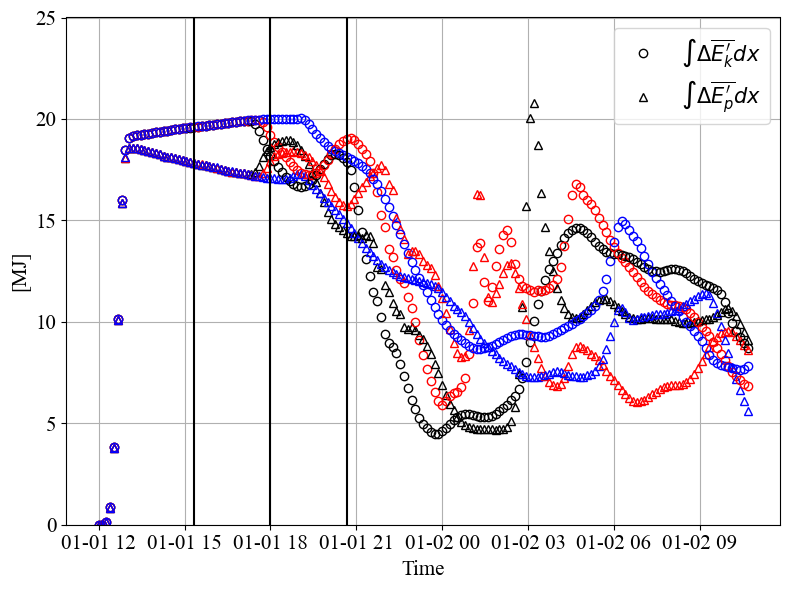

In [18]:
# x-integrated energy
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8,6), sharex=True, sharey=True)

idx_y1 = int(len(data.y)/2)
for i in range(len(data.time)):
    if i == 0:
        ax.plot(data.time[i].data, data.dEk_prime[i,:,idx_y1].integrate('x').data*1e-6, 'ko', mfc='none', label="$\int\Delta\overline{E_k'}dx$")
        ax.plot(data.time[i].data, data.dEp_prime[i,:,idx_y1].integrate('x').data*1e-6, 'k^', mfc='none', label="$\int\Delta\overline{E_p'}dx$")
        ax.plot(data.time[i].data, data.dEk_prime[i,:,idx_y2].integrate('x').data*1e-6, 'ro', mfc='none')
        ax.plot(data.time[i].data, data.dEp_prime[i,:,idx_y2].integrate('x').data*1e-6, 'r^', mfc='none')
        ax.plot(data.time[i].data, data.dEk_prime[i,:,idx_y3].integrate('x').data*1e-6, 'bo', mfc='none')
        ax.plot(data.time[i].data, data.dEp_prime[i,:,idx_y3].integrate('x').data*1e-6, 'b^', mfc='none')
    else:
        ax.plot(data.time[i].data, data.dEk_prime[i,:,idx_y1].integrate('x').data*1e-6, 'ko', mfc='none')
        ax.plot(data.time[i].data, data.dEp_prime[i,:,idx_y1].integrate('x').data*1e-6, 'k^', mfc='none')
        ax.plot(data.time[i].data, data.dEk_prime[i,:,idx_y2].integrate('x').data*1e-6, 'ro', mfc='none')
        ax.plot(data.time[i].data, data.dEp_prime[i,:,idx_y2].integrate('x').data*1e-6, 'r^', mfc='none')
        ax.plot(data.time[i].data, data.dEk_prime[i,:,idx_y3].integrate('x').data*1e-6, 'bo', mfc='none')
        ax.plot(data.time[i].data, data.dEp_prime[i,:,idx_y3].integrate('x').data*1e-6, 'b^', mfc='none')

ax.set_title(f'')
ax.set_xlabel(f'Time', fontsize=15)
ax.set_ylabel(f'[MJ]', fontsize=15)
ax.legend(fontsize=15)
# ax.set_xlim([data.time[10].data, data.time[70].data])
ax.set_ylim([0,25])
for idx_t in [25,45,65]:
    ax.plot([data.time[idx_t].data, data.time[idx_t].data], [0, 50], 'k')
ax.tick_params(axis='both', which='major', labelsize=15)
ax.grid()
plt.tight_layout()

# plt.savefig(outfilepath+ f"Ek_Ep_crosssec_side.jpeg", dpi=300)

## dissip

In [21]:
cutoff_depth = 180

In [19]:
dissip_rate = data.dissip.differentiate("time",datetime_unit="s")

In [22]:
dissp_rate_ = dissip_rate.copy()
for i in range(len(dissp_rate_.time)):
    var_ = dissp_rate_[i,:,:].data
    var_[np.where(data.depth.data>=cutoff_depth)] = 0
    dissp_rate_[i,:,:] = var_

dissp_rate_in = dissp_rate_.integrate('x')
dissp_rate_in = dissp_rate_in.integrate('y')*1e-6

dissp_rate_ = dissip_rate.copy()
for i in range(len(dissp_rate_.time)):
    var_ = dissp_rate_[i,:,:].data
    var_[np.where((data.depth.data<cutoff_depth)|(data.depth.data==600))] = 0
    dissp_rate_[i,:,:] = var_

dissp_rate_out = dissp_rate_.integrate('x')
dissp_rate_out = dissp_rate_out.integrate('y')*1e-6

In [23]:
dis_c = np.zeros((len(data.x), len(data.y)))
for i in range(len(data.x)):
    for j in range(len(data.y)):
        dis_c[i,j] = np.sqrt((data.x[i].data-x_c)**2+(data.y[j].data-y_c)**2)
        
theta_c = np.zeros((len(data.x), len(data.y)))
for i in range(len(data.x)):
    for j in range(len(data.y)):
        theta_c[i,j] = np.arctan2(data.y[j].data-y_c, data.x[i].data-x_c)

In [24]:
dis_shoal = np.mean(dis_c[np.where((data.depth>=cutoff_depth-1) & (data.depth.data<=cutoff_depth+1))])
dis_out = np.mean(dis_c[np.where((data.depth>=599) & (data.depth.data<600))])
quadrants_info = {
    "r_quad": np.array([dis_shoal,dis_out]),
    "quadrants": ['east', 'north', 'west', 'south'],
    "theta_quad": [[-45, 45], [45, 135], [135, -135], [-135, -45]]
            }

In [25]:
# mask out data outside of the rings  
mask_ring = (dis_c<quadrants_info["r_quad"][0])
mask_ring_east = mask_ring & (theta_c>=quadrants_info["theta_quad"][0][0]*np.pi/180) & (theta_c<quadrants_info["theta_quad"][0][1]*np.pi/180)
mask_ring_north = mask_ring & (theta_c>=quadrants_info["theta_quad"][1][0]*np.pi/180) & (theta_c<quadrants_info["theta_quad"][1][1]*np.pi/180)
mask_ring_west = mask_ring & ((theta_c>=quadrants_info["theta_quad"][2][0]*np.pi/180) | (theta_c<quadrants_info["theta_quad"][2][1]*np.pi/180))
mask_ring_south = mask_ring & (theta_c>=quadrants_info["theta_quad"][-1][0]*np.pi/180) & (theta_c<quadrants_info["theta_quad"][-1][1]*np.pi/180)

dissp_rate_int_inner = np.zeros((4, len(data.time)))
dissp_rate_ = dissip_rate.copy()
for i in range(len(dissp_rate_.time)):
    var_ = dissp_rate_[i,:,:].data
    var_[~mask_ring_east] = 0
    dissp_rate_[i,:,:] = var_
dissp_rate_out_ = dissp_rate_.integrate('x')
dissp_rate_int_inner[0,:] = dissp_rate_out_.integrate('y')*1e-6

dissp_rate_ = dissip_rate.copy()
for i in range(len(dissp_rate_.time)):
    var_ = dissp_rate_[i,:,:].data
    var_[~mask_ring_north] = 0
    dissp_rate_[i,:,:] = var_
dissp_rate_out_ = dissp_rate_.integrate('x')
dissp_rate_int_inner[1,:] = dissp_rate_out_.integrate('y')*1e-6

dissp_rate_ = dissip_rate.copy()
for i in range(len(dissp_rate_.time)):
    var_ = dissp_rate_[i,:,:].data
    var_[~mask_ring_west] = 0
    dissp_rate_[i,:,:] = var_
dissp_rate_out_ = dissp_rate_.integrate('x')
dissp_rate_int_inner[2,:] = dissp_rate_out_.integrate('y')*1e-6

dissp_rate_ = dissip_rate.copy()
for i in range(len(dissp_rate_.time)):
    var_ = dissp_rate_[i,:,:].data
    var_[~mask_ring_south] = 0
    dissp_rate_[i,:,:] = var_
dissp_rate_out_ = dissp_rate_.integrate('x')
dissp_rate_int_inner[-1,:] = dissp_rate_out_.integrate('y')*1e-6


In [26]:
# mask out data outside of the rings  
mask_ring = (dis_c>=quadrants_info["r_quad"][0]) & (dis_c<quadrants_info["r_quad"][-1])
mask_ring_east = mask_ring & (theta_c>=quadrants_info["theta_quad"][0][0]*np.pi/180) & (theta_c<quadrants_info["theta_quad"][0][1]*np.pi/180)
mask_ring_north = mask_ring & (theta_c>=quadrants_info["theta_quad"][1][0]*np.pi/180) & (theta_c<quadrants_info["theta_quad"][1][1]*np.pi/180)
mask_ring_west = mask_ring & ((theta_c>=quadrants_info["theta_quad"][2][0]*np.pi/180) | (theta_c<quadrants_info["theta_quad"][2][1]*np.pi/180))
mask_ring_south = mask_ring & (theta_c>=quadrants_info["theta_quad"][-1][0]*np.pi/180) & (theta_c<quadrants_info["theta_quad"][-1][1]*np.pi/180)

dissp_rate_int_outter = np.zeros((4, len(data.time)))
dissp_rate_ = dissip_rate.copy()
for i in range(len(dissp_rate_.time)):
    var_ = dissp_rate_[i,:,:].data
    var_[~mask_ring_east] = 0
    dissp_rate_[i,:,:] = var_
dissp_rate_out_ = dissp_rate_.integrate('x')
dissp_rate_int_outter[0,:] = dissp_rate_out_.integrate('y')*1e-6

dissp_rate_ = dissip_rate.copy()
for i in range(len(dissp_rate_.time)):
    var_ = dissp_rate_[i,:,:].data
    var_[~mask_ring_north] = 0
    dissp_rate_[i,:,:] = var_
dissp_rate_out_ = dissp_rate_.integrate('x')
dissp_rate_int_outter[1,:] = dissp_rate_out_.integrate('y')*1e-6

dissp_rate_ = dissip_rate.copy()
for i in range(len(dissp_rate_.time)):
    var_ = dissp_rate_[i,:,:].data
    var_[~mask_ring_west] = 0
    dissp_rate_[i,:,:] = var_
dissp_rate_out_ = dissp_rate_.integrate('x')
dissp_rate_int_outter[2,:] = dissp_rate_out_.integrate('y')*1e-6

dissp_rate_ = dissip_rate.copy()
for i in range(len(dissp_rate_.time)):
    var_ = dissp_rate_[i,:,:].data
    var_[~mask_ring_south] = 0
    dissp_rate_[i,:,:] = var_
dissp_rate_out_ = dissp_rate_.integrate('x')
dissp_rate_int_outter[-1,:] = dissp_rate_out_.integrate('y')*1e-6


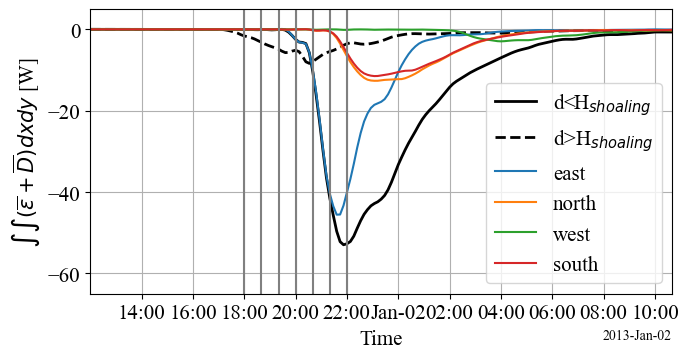

In [27]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(7,3.7))
dissp_rate_in.plot(c='k', lw=2, ax=ax, label='d<H$_{shoaling}$')
dissp_rate_out.plot(c='k', ls='--', lw=2, ax=ax, label='d>H$_{shoaling}$')
for i in range(4):
    ax.plot(data.time, dissp_rate_int_inner[i,:], label=quadrants_info['quadrants'][i])
# ax.plot(data.time, np.sum(dissp_rate_int_inner,axis=0))
ax.legend(fontsize=15, ncol=1, loc='lower right')
ax.set_ylim([-65,5])
ax.set_xlim([data.time[0].data,data.time[-1].data])
ax.set_xlabel('Time', fontsize=15)
ax.set_ylabel(r"$\int\int(\overline{\epsilon}+\overline{D})dxdy$ [W]", fontsize=15)
ax.tick_params(axis='both', which='major', labelsize=15)
ax.tick_params(axis='both', which='major', labelsize=15)
ax.set_title('')
ax.grid()
plt.tight_layout()
for idx_t in np.arange(45,80,5):
    ax.plot([data.time[idx_t].data, data.time[idx_t].data], [-65, 5], '.5')
plt.rcParams["font.family"] = "Times New Roman"    
# plt.savefig(outfilepath+ f"dissp_rate_areaintegrate_quadrants.jpeg", dpi=300)


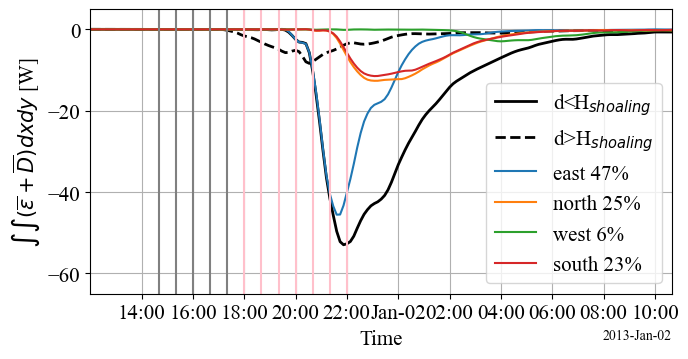

In [28]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(7,3.7))
dissp_rate_in.plot(c='k', lw=2, ax=ax, label='d<H$_{shoaling}$')
dissp_rate_out.plot(c='k', ls='--', lw=2, ax=ax, label='d>H$_{shoaling}$')
for i in range(4):
    ax.plot(data.time, dissp_rate_int_inner[i,:], label=quadrants_info['quadrants'][i]+' '+str(int(np.round(np.trapz(dissp_rate_int_inner[i,:])/np.trapz(dissp_rate_in.data)*100)))+'%')
# ax.plot(data.time, np.sum(dissp_rate_int_inner,axis=0))
ax.legend(fontsize=15, ncol=1, loc='lower right')
ax.set_ylim([-65,5])
ax.set_xlim([data.time[0].data,data.time[-1].data])
ax.set_xlabel('Time', fontsize=15)
ax.set_ylabel(r"$\int\int(\overline{\epsilon}+\overline{D})dxdy$ [W]", fontsize=15)
ax.tick_params(axis='both', which='major', labelsize=15)
ax.tick_params(axis='both', which='major', labelsize=15)
ax.set_title('')
ax.grid()
plt.tight_layout()
for idx_t in np.arange(20,40+1,5):
    ax.plot([data.time[idx_t].data, data.time[idx_t].data], [-65, 5], '.5')
for idx_t in np.arange(45,80,5):
    ax.plot([data.time[idx_t].data, data.time[idx_t].data], [-65, 5], 'pink')
plt.rcParams["font.family"] = "Times New Roman"    
# plt.savefig(outfilepath+ f"dissp_rate_areaintegrate_quadrants.jpeg", dpi=300)


## Drag

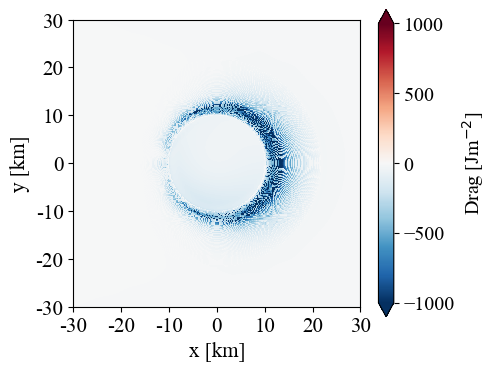

In [40]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(5,4))
im1 = (-data.D_0[-1,:,:]-data.D_prime[-1,:,:]).T.plot(ax=ax, vmax=1e3, vmin=-1e3, cmap=cm.RdBu_r, add_colorbar=False)
cb1 = plt.colorbar(im1, location='right', extend='both')
cb1.set_label(label=r"Drag [Jm$^{-2}$]", size='x-large')
cb1.ax.tick_params(labelsize='x-large')

ax.set_xlim([x_c-30000, x_c+30000])
ax.set_ylim([y_c-30000, y_c+30000])
ax.set_xticks(np.arange(x_c-30000,x_c+30000+1,10000))
ax.set_yticks(np.arange(y_c-30000,y_c+30000+1,10000))
ax.set_xticklabels(['-30','-20', '-10', '0', '10', '20','30'])
ax.set_yticklabels(['-30','-20', '-10', '0', '10', '20','30'])
ax.set_aspect('equal')
ax.set_xlabel('x [km]', fontsize=15)
ax.set_ylabel('y [km]', fontsize=15)
ax.set_title(f'')
ax.tick_params(axis='both', which='major', labelsize=15)
plt.rcParams["font.family"] = "Times New Roman"
plt.tight_layout()

# plt.savefig(outfilepath+ f"C_overhead.jpeg", dpi=300)

## Convergence

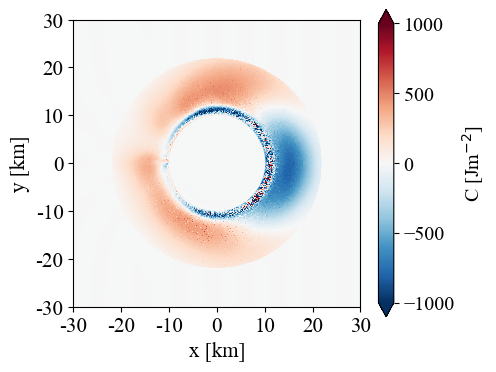

In [33]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(5,4))
im1 = (data.C1_int[-1,:,:]+data.C2_int[-1,:,:]).T.plot(ax=ax, vmax=1e3, vmin=-1e3, cmap=cm.RdBu_r, add_colorbar=False)
cb1 = plt.colorbar(im1, location='right', extend='both')
cb1.set_label(label=r"C [Jm$^{-2}$]", size='x-large')
cb1.ax.tick_params(labelsize='x-large')

ax.set_xlim([x_c-30000, x_c+30000])
ax.set_ylim([y_c-30000, y_c+30000])
ax.set_xticks(np.arange(x_c-30000,x_c+30000+1,10000))
ax.set_yticks(np.arange(y_c-30000,y_c+30000+1,10000))
ax.set_xticklabels(['-30','-20', '-10', '0', '10', '20','30'])
ax.set_yticklabels(['-30','-20', '-10', '0', '10', '20','30'])
ax.set_aspect('equal')
ax.set_xlabel('x [km]', fontsize=15)
ax.set_ylabel('y [km]', fontsize=15)
ax.set_title(f'')
ax.tick_params(axis='both', which='major', labelsize=15)
plt.rcParams["font.family"] = "Times New Roman"
plt.tight_layout()

# plt.savefig(outfilepath+ f"C_overhead.jpeg", dpi=300)

# Energy flux